# **Santander Customer Satisfaction**: Detecting Dissatisfied Customers
<br>




##**INTRODUCTION**



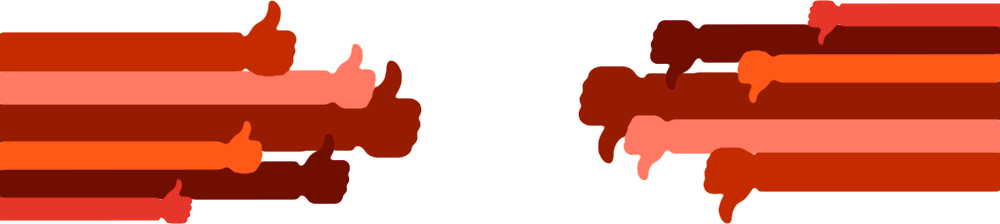




The inspiration in choosing this project is it's universal applicability across various domains and finding out if a customer is happy or not with the products or services offered can tackle many a great challenge in overcoming hurdles.
Customer satisfaction is a consumer’s understanding of how well an organization has delivered on their proposed and communicated value proposition. It is also one of the most important key performance indicators in every company today and is seen as a key element of a company’s success. Unhappy customers change their options in a second based on their expectations delivered from the company.
Santander is a Spanish multinational corporation bank and financial based company which operates in Europe, North and South America and Asia.<br>
This problem is a classification modelling task to determine whether a customer (datapoint) is dissatisfied or not.<br>
We are given two files :**a test.csv** and **train.csv** which contains around 370 features which are anonymized and 1 dependent feature that is TARGET. Each datapoint represents a customer and the value in TARGET will be **1** if a customer is dissatisfied with the company’s service and **0** if he is satisfied and also the dataset is heavily imbalanced.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Libraries and Data

In [ ]:
#installing libraries
!pip install shapash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.7/652.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.0 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=88ce57f73b6684622024add578f8330165e31e3611e41647147f4f1a3451268c
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf


In [ ]:
!pip install lightgbm

###Importing relevant libraries

In [ ]:
#!pip install imblearn

#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

import seaborn as sn
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import shapash
import lightgbm as lgb

SEED=42

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


###Importing data to take a look at its features

In [ ]:
train = pd.read_csv('drive/MyDrive/Colab Notebooks/train.csv')
train.head().T

,0,1,2,3,4
ID,1.00,3.00,4.00,8.00,10.000000
var3,2.00,2.00,2.00,2.00,2.000000
var15,23.00,34.00,23.00,37.00,39.000000
imp_ent_var16_ult1,0.00,0.00,0.00,0.00,0.000000
imp_op_var39_comer_ult1,0.00,0.00,0.00,195.00,0.000000
...,...,...,...,...,...
saldo_medio_var44_hace3,0.00,0.00,0.00,0.00,0.000000
saldo_medio_var44_ult1,0.00,0.00,0.00,0.00,0.000000
saldo_medio_var44_ult3,0.00,0.00,0.00,0.00,0.000000
var38,39205.17,49278.03,67333.77,64007.97,117310.979016


In [ ]:
X_train,X_test, y_train,y_test = train_test_split(train.drop(columns=["ID","TARGET"]),train["TARGET"],random_state=SEED)

In [ ]:
print("X train shape : ",X_train.shape)
print("y train shape : ",y_train.shape)
print("X test shape : ",X_test.shape)
print("y test shape : ",y_test.shape)

X train shape :  (57015, 369)
y train shape :  (57015,)
X test shape :  (19005, 369)
y test shape :  (19005,)


## Data cleaning and Feature Selection


### Data Cleaning



#### 1.**Remove constant features** - <br>
Using variance threshold from sklearn    Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.





In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train,columns = sel.get_feature_names_out())

In [ ]:
X_test = pd.DataFrame(X_test,columns = sel.get_feature_names_out())

In [ ]:
X_train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2.0,29.0,0.0,147.00,581.97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75102.21
1,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196492.86
2,2.0,41.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180088.29
3,2.0,41.0,0.0,416.97,1161.03,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123488.85
4,2.0,30.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65561.58


#### 2.**Removing quasi-constant features** - <br>



Quasi-constant features are those that show the same value for the great majority of the observations of the dataset

In [ ]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
sel.fit(X_train)
# we can then remove the features from training and test set
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
X_train = pd.DataFrame(X_train,columns = sel.get_feature_names_out())
X_train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2.0,29.0,0.0,147.00,581.97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75102.21
1,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196492.86
2,2.0,41.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180088.29
3,2.0,41.0,0.0,416.97,1161.03,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123488.85
4,2.0,30.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65561.58


In [ ]:
X_test = pd.DataFrame(X_test,columns = sel.get_feature_names_out())
X_test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2.0,45.0,0.0,709.05,1399.17,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77930.250000
1,2.0,60.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165125.040000
2,2.0,27.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82636.440000
3,2.0,38.0,0.0,269.40,754.05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67460.550000
4,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


#### 3.Correlation  <br>
 * Good variables are highly correlated with the target.
 *   Variables should be uncorrelated among themselves.




<Axes: >

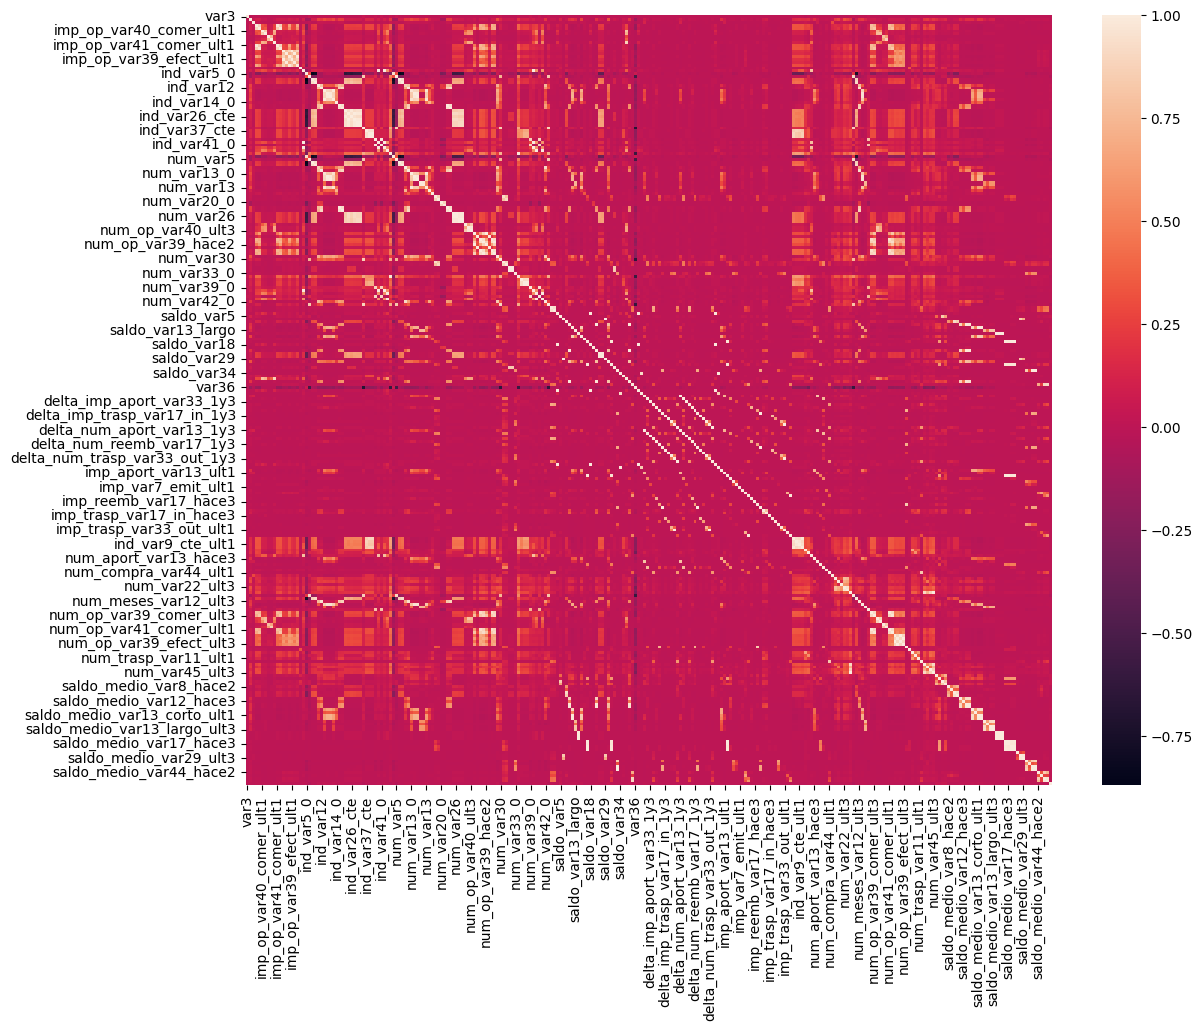

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(X_train.corr())

In [ ]:
#getting the correlation matrix
train_corr = X_train.corr().abs()

In [ ]:
upper = train_corr.where(np.triu(np.ones(train_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_train = X_train.drop(columns=to_drop,axis=1)

In [ ]:
X_train.shape

(57015, 120)

#### 5.Removing duplicate rows


In [ ]:
X_train["y_train"]=y_train
X_train = X_train.drop_duplicates()

#### 6.Removing na values

In [ ]:
X_train = X_train.dropna()

In [ ]:
# separating X and y train
y_train = X_train["y_train"]
X_train = X_train.drop("y_train",axis=1)

In [ ]:
#checking if number of rows is uniform
assert X_train.shape[0]==y_train.shape[0]

### Feature Selection

#### Feature selection using Shapash

In [ ]:
#skip cell
%%script echo skipping
regressor = lgb.LGBMRegressor(n_estimators=1000,random_state=42).fit(X_train,y_train)

from shapash.explainer.smart_explainer import SmartExplainer
sxpl = SmartExplainer(
    model=regressor)


sxpl.compile(
    x=X_train,
    y_pred=y_train)


skipping


In [ ]:
#skip cell
%%script echo skipping
import pickle
with open('/content/drive/MyDrive/Santander/sxpl.pickle', 'wb') as f: # should be 'wb' rather than 'w'
    pickle.dump(sxpl, f)

skipping


In [ ]:
#load saved smart explainer object
PATH = '/content/drive/MyDrive/Santander/'
import pickle
with open(PATH + 'sxpl.pickle','rb') as f:
    sxpl = pickle.load(f)

In [ ]:
#plot of top 20 important features
sxpl.plot.features_importance()

In [ ]:
plt1 = sxpl.plot.features_importance()
most_imp_features = list(plt1['data'][0]['customdata'])
most_imp_features

['num_var22_hace3',
 'imp_op_var41_efect_ult1',
 'num_var22_hace2',
 'imp_var43_emit_ult1',
 'num_op_var41_ult1',
 'saldo_var12',
 'imp_op_var39_comer_ult1',
 'imp_trans_var37_ult1',
 'num_op_var41_hace2',
 'num_med_var45_ult3',
 'num_var22_ult3',
 'num_var45_hace3',
 'var36',
 'num_var4',
 'saldo_var30',
 'saldo_var5',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'var15',
 'var38']

#### Subsetting the dataset to only the top 20 features

In [ ]:
X_train = X_train[most_imp_features]
print(f"X_train shape: {X_train.shape}")
X_train.head()

X_train shape: (40046, 20)


,num_var22_hace3,imp_op_var41_efect_ult1,num_var22_hace2,imp_var43_emit_ult1,num_op_var41_ult1,saldo_var12,imp_op_var39_comer_ult1,imp_trans_var37_ult1,num_op_var41_hace2,num_med_var45_ult3,num_var22_ult3,num_var45_hace3,var36,num_var4,saldo_var30,saldo_var5,saldo_medio_var5_hace2,saldo_medio_var5_hace3,var15,var38
0,0.0,60.0,0.0,0.0,6.0,0.0,147.00,0.0,15.0,15.0,0.0,0.0,2.0,2.0,9.27,9.27,668.01,0.00,29.0,75102.21
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.00,3.00,3.00,2.55,23.0,196492.86
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.0,1.0,300.00,300.00,300.00,209.97,41.0,180088.29
3,3.0,2550.0,0.0,0.0,54.0,0.0,416.97,0.0,42.0,42.0,3.0,18.0,3.0,3.0,8.25,0.00,84.96,347.85,41.0,123488.85
5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.00,0.00,0.00,0.00,30.0,71195.70


In [ ]:
X_test=X_test[most_imp_features]
print(f"X_test shape: {X_test.shape}")
X_test.head()

X_test shape: (19005, 20)


,num_var22_hace3,imp_op_var41_efect_ult1,num_var22_hace2,imp_var43_emit_ult1,num_op_var41_ult1,saldo_var12,imp_op_var39_comer_ult1,imp_trans_var37_ult1,num_op_var41_hace2,num_med_var45_ult3,num_var22_ult3,num_var45_hace3,var36,num_var4,saldo_var30,saldo_var5,saldo_medio_var5_hace2,saldo_medio_var5_hace3,var15,var38
0,6.0,0.0,0.0,168.0,12.0,0.0,709.05,780.0,12.0,18.0,6.0,36.0,1.0,2.0,781.47,781.47,553.11,42.03,45.0,77930.250000
1,12.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,6.0,12.0,21.0,3.0,2.0,240003.00,3.00,3.00,54195.09,60.0,165125.040000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,3.0,3.0,1.0,60.00,60.00,60.00,45.51,27.0,82636.440000
3,6.0,360.0,3.0,135.0,18.0,0.0,269.40,0.0,33.0,9.0,9.0,9.0,1.0,3.0,293.70,293.70,1464.06,772.29,38.0,67460.550000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.00,3.00,3.00,1.86,23.0,117310.979016


## Data imbalance

#### Checking for data imbalance

In [ ]:
y_train.value_counts(normalize=True)

0.0    0.960021
1.0    0.039979
Name: y_train, dtype: float64

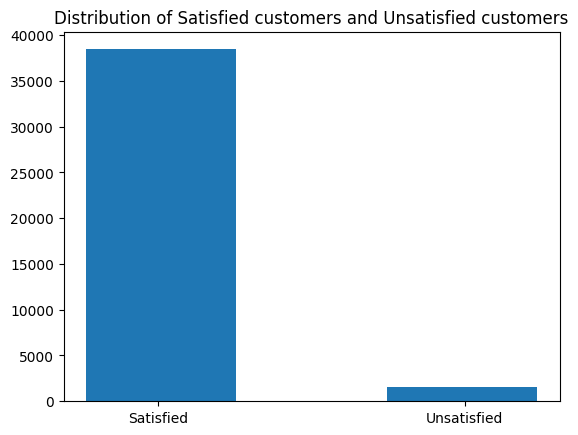

In [ ]:
plt.hist(y_train,bins=3)
plt.xticks([0.16,0.84],labels=['Satisfied','Unsatisfied'])
plt.title("Distribution of Satisfied customers and Unsatisfied customers");

* Since the dataset is highly imbalanced, the orginal dataframe is modified to be balanced.<br>
* The models will be evaluated on both datasets.
* The imbalanced dataset will be evaluated with a metric which is more oriented towards detecting unsatisfied customers.
* The imbalanced dataset will be downsampled first then the models will be trained with class_weights = ‘balanced’ and roc_auc score will be used as the main metric.



#### Balancing the data

It can be seen that the ratio of majority class to minority is abt 24:1.<br>
So for balancing the data , the majority class is downsampled by a factor of 12.
The dataset is also weighted by using class_weight=balanced in every model trained.

In [ ]:
#skip cell
%%script echo skipping
from sklearn.utils import resample
train_df = X_train.assign(y_train =y_train)
maj_class = train_df[train_df['y_train']==0]
min_class = train_df[train_df['y_train']!=0]

res_maj_class = resample(maj_class,
             n_samples=len(maj_class)//12,
             random_state=42)

dsmp_train_df = pd.concat([min_class,res_maj_class])
X_train_dsmp = dsmp_train_df.drop('y_train',axis=1)
y_train_dsmp = dsmp_train_df['y_train']

### Normalizing the data

In [ ]:
#skip cell
%%script echo skipping

from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(mm_scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(mm_scaler.transform(X_test),columns=X_test.columns)

mm_scaler = MinMaxScaler()
X_train_dsmp_scaled = pd.DataFrame(mm_scaler.fit_transform(X_train_dsmp),columns=X_train_dsmp.columns)
X_dsmp_test_scaled = pd.DataFrame(mm_scaler.transform(X_test),columns=X_test.columns)



#### Saving/Loading the cleaned dataset

In [ ]:
#skip cell
%%script echo skipping
#Saving the train data
X_train_scaled.to_csv(PATH+'x_train_scaled.csv')
y_train.to_csv(PATH+'y_train.csv')

X_train_dsmp_scaled.to_csv(PATH+'x_train_dsmp_scaled.csv')
y_train_dsmp.to_csv(PATH+'y_train_dsmp.csv')

X_dsmp_test_scaled.to_csv(PATH+'x_dsmp_test_scaled_dsmp.csv')
X_test_scaled.to_csv(PATH+'x_test_scaled_dsmp.csv')

In [ ]:
#Loading the data
X_train_scaled = pd.read_csv(PATH+'x_train_scaled.csv',index_col=0)
y_train = pd.read_csv(PATH+'y_train.csv',index_col=0).values.reshape(40046,)
X_train_dsmp_scaled = pd.read_csv(PATH+'x_train_dsmp_scaled.csv',index_col=0)
y_train_dsmp = pd.read_csv(PATH+'y_train_dsmp.csv',index_col=0).values.reshape(4804,)
X_dsmp_test_scaled = pd.read_csv(PATH+'x_dsmp_test_scaled_dsmp.csv',index_col=0)
X_test_scaled = pd.read_csv(PATH+'x_test_scaled_dsmp.csv',index_col=0)

In [ ]:
#proportion of classes
pd.Series(y_train_dsmp).value_counts(normalize=True)

0.0    0.666736
1.0    0.333264
dtype: float64

In [ ]:
X_train_scaled.head()

,num_var22_hace3,imp_op_var41_efect_ult1,num_var22_hace2,imp_var43_emit_ult1,num_op_var41_ult1,saldo_var12,imp_op_var39_comer_ult1,imp_trans_var37_ult1,num_op_var41_hace2,num_med_var45_ult3,num_var22_ult3,num_var45_hace3,var36,num_var4,saldo_var30,saldo_var5,saldo_medio_var5_hace2,saldo_medio_var5_hace3,var15,var38
0,0.000000,0.001305,0.0,0.0,0.027027,0.0,0.011406,0.0,0.074627,0.060241,0.000000,0.000000,0.020202,0.285714,0.001430,0.002980,0.000859,0.000005,0.24,0.003175
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.030303,0.142857,0.001428,0.002970,0.000040,0.000007,0.18,0.008685
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.030303,0.142857,0.001514,0.003448,0.000406,0.000141,0.36,0.007940
3,0.027778,0.055447,0.0,0.0,0.243243,0.0,0.032353,0.0,0.208955,0.168675,0.012821,0.053097,0.030303,0.428571,0.001430,0.002965,0.000141,0.000231,0.36,0.005371
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.001427,0.002965,0.000037,0.000005,0.25,0.002997


## Models

In [ ]:
#creating a dataframe to store model test scores
model_scores = pd.DataFrame(columns=["Accuracy","Recall","Precision","F1 score","ROC AUC Score"],
                            index=["Logistic Regression",'Logistic Regression (imbalanced data)',"Decision Trees",'Decision Trees (imbalanced data)',
                                   "Random Forest",'Random Forest (imbalanced data)', "KNN Classifier",'KNN Classifier (imbalanced data)',
                                   "Support Vector Machine",'Support Vector Machine (imbalanced data)', "XGBoost", 'XGBoost (imbalanced data)',
                                   "Light GBM",'Light GBM (imbalanced data)',"Artificial NN",'Artificial NN (imbalanced data)'])
model_scores


,Accuracy,Recall,Precision,F1 score,ROC AUC Score
Logistic Regression,NaN,NaN,NaN,NaN,NaN
Logistic Regression (imbalanced data),NaN,NaN,NaN,NaN,NaN
Decision Trees,NaN,NaN,NaN,NaN,NaN
Decision Trees (imbalanced data),NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN
Random Forest (imbalanced data),NaN,NaN,NaN,NaN,NaN
KNN Classifier,NaN,NaN,NaN,NaN,NaN
KNN Classifier (imbalanced data),NaN,NaN,NaN,NaN,NaN
Support Vector Machine,NaN,NaN,NaN,NaN,NaN
Support Vector Machine (imbalanced data),NaN,NaN,NaN,NaN,NaN


In [ ]:
len(X_dsmp_test_scaled)==len(y_test)

True

In [ ]:
## Helper functions##

# fn to calculate scores for a model
def calc_scores(model,dsmp=True,train=False):

    if train:

        if dsmp:
            X_temp = X_train_dsmp_scaled
            y_temp = y_train_dsmp

        else:
            X_temp = X_train_scaled
            y_temp = y_train

    else:

        if dsmp:
            X_temp = X_dsmp_test_scaled
            y_temp = y_test

        else:
            X_temp = X_test_scaled
            y_temp = y_test



    y_pred = model.predict(X_temp)
    y_pred_proba = model.predict_proba(X_temp)[:, 1]


    scores=dict()
    scores["accuracy"] = accuracy_score(y_temp,y_pred)
    scores["recall"] = recall_score(y_temp,y_pred)
    scores["precision"] = precision_score(y_temp,y_pred)
    scores["f1"] = f1_score(y_temp,y_pred)
    scores["roc"] = roc_auc_score(y_temp,y_pred_proba)

    return scores

#fn to enter calculated scores into df
def store_scores(scores,row=0,df=model_scores):
    df.iloc[row][0] = scores["accuracy"]
    df.iloc[row][1] = scores["recall"]
    df.iloc[row][2] = scores["precision"]
    df.iloc[row][3] = scores["f1"]
    df.iloc[row][4] = scores["roc"]

    print("Scores added to the dataframe :")
    display(df.iloc[[row]])


###Logistic Regression (base model)

#### Balanced dataset model

In [ ]:
#initializing the model
lr_model_balanced = LogisticRegression(random_state=SEED,n_jobs=-1)

#defining the param_grid for GridSearchCV
param_grid = {
    'penalty':['elasticnet','l2','l1'],
    'tol':[0.001,0.0001,0.00001],
    'C':[0.1,0.5,1.0],
    'max_iter':[10,100,1000],
    'l1_ratio':[0.3,0.5,0.8]
}


In [ ]:
#skip cell
%%script echo skipping
#training the model using grid search cv for hyperparameter tuning
grid_search_lr = GridSearchCV(estimator = lr_model_balanced, param_grid = param_grid,scoring = {'AUC': 'roc_auc'},refit='AUC',n_jobs=-1)
grid_search_lr.fit(X_train_dsmp_scaled,y_train_dsmp)

skipping


In [ ]:
#skip cell
%%script echo skipping
best_lr_model = grid_search_lr.best_estimator_

skipping


In [ ]:
#skip cell
%%script echo skipping
#saving the best model
import pickle
with open(PATH + 'best_lr_model.pickle', 'wb') as f:
    pickle.dump(best_lr_model, f)

skipping


In [ ]:
#loading the best model
import pickle
with open(PATH + 'best_lr_model.pickle','rb') as f:
    best_lr_model = pickle.load(f)


In [ ]:
# displaying train scores
calc_scores(best_lr_model,train=True)

{'accuracy': 0.667985012489592,
 'recall': 0.0037476577139287947,
 'precision': 1.0,
 'f1': 0.0074673304293715,
 'roc': 0.5203446643849468}

In [ ]:
#calculating scores for the model and storing in model_scores
row=0
store_scores(calc_scores(best_lr_model),row=row)

Scores added to the dataframe :


,Accuracy,Recall,Precision,F1 score,ROC AUC Score
Logistic Regression,0.9588,0.005249,0.137931,0.010114,0.667658


#### Imbalanced dataset model

In [ ]:
#initializing the model
lr_model_weighted = LogisticRegression(random_state=SEED,class_weight='balanced',n_jobs=-1)

#defining the param_grid for GridSearchCV
param_grid = {
    'penalty':['elasticnet','l2','l1'],
    'tol':[0.001,0.0001,0.00001],
    'C':[0.1,0.5,1.0],
    'max_iter':[10,100,1000],
    'l1_ratio':[0.3,0.5,0.8]
}


In [ ]:
#skip cell
#%%script echo skipping
#training the model using grid search cv for hyperparameter tuning
grid_search_lrw = GridSearchCV(estimator = lr_model_weighted, param_grid = param_grid,scoring = {'AUC': 'roc_auc'},refit='AUC',n_jobs=-1)
grid_search_lrw.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


810 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

GridSearchCV(estimator=LogisticRegression(class_weight='balanced', n_jobs=-1,
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.0], 'l1_ratio': [0.3, 0.5, 0.8],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['elasticnet', 'l2', 'l1'],
                         'tol': [0.001, 0.0001, 1e-05]},
             refit='AUC', scoring={'AUC': 'roc_auc'})

In [ ]:
#skip cell
%%script echo skipping
best_lrw_model = grid_search_lrw.best_estimator_

skipping


In [ ]:
#skip cell
%%script echo skipping
#saving the best model
with open(PATH + 'best_lrw_model.pickle', 'wb') as f:
    pickle.dump(best_lrw_model, f)

skipping


In [ ]:
#loading the best model
with open(PATH + 'best_lrw_model.pickle','rb') as f:
    best_lrw_model = pickle.load(f)

In [ ]:
#calculating scores for the model and storing in model_scores
row=1
store_scores(calc_scores(best_lrw_model),row=row)

Scores added to the dataframe :


,Accuracy,Recall,Precision,F1 score,ROC AUC Score
Logistic Regression (imbalanced data),0.222626,0.862205,0.042868,0.081676,0.548107


### Decision trees


#### Base model

In [ ]:
dt = DecisionTreeClassifier(random_state=SEED, class_weight='balanced')
dt.fit(X_train_dsmp_scaled,y_train_dsmp)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
calc_scores(dt)

{'accuracy': 0.6187845303867403,
 'recall': 0.38451443569553806,
 'precision': 0.04144857829961805,
 'f1': 0.07483080066402759,
 'roc': 0.5041851165578485}

####Balanced dataset model

In [ ]:
#initializing the model
dt_model = DecisionTreeClassifier(random_state=SEED)

#defining the param_grid for GridSearchCV
param_grid = {
    'max_depth':[42,43,45,46,47,48],
    'min_samples_split':[9,10,11,12,13],
    'min_samples_leaf':[2,3,4,5],
    'max_features':["sqrt"]

}


In [ ]:
#skip cell
#%%script echo skipping
#training the model using grid search cv for hyperparameter tuning
grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid,scoring = {'AUC': 'roc_auc'},refit='AUC',n_jobs=-1)
grid_search_dt.fit(X_train_dsmp_scaled,y_train_dsmp)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [42, 43, 45, 46, 47, 48],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [9, 10, 11, 12, 13]},
             refit='AUC', scoring={'AUC': 'roc_auc'})

In [ ]:
#skip cell
#%%script echo skipping
best_dt_model = grid_search_dt.best_estimator_
best_dt_model

DecisionTreeClassifier(max_depth=43, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=9, random_state=42)

In [ ]:
calc_scores(best_dt_model)

{'accuracy': 0.6962904498816102,
 'recall': 0.3228346456692913,
 'precision': 0.04471101417666303,
 'f1': 0.078544061302682,
 'roc': 0.5009582649397899}

In [ ]:
best_dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
#skip cell
#%%script echo skipping
#saving the best model
import pickle
with open(PATH + 'best_lr_model.pickle', 'wb') as f:
    pickle.dump(best_lr_model, f)

skipping


In [ ]:
#loading the best model
import pickle
with open(PATH + 'best_lr_model.pickle','rb') as f:
    best_lr_model = pickle.load(f)


In [ ]:
#calculating scores for the model and storing in model_scores
row=0
store_scores(calc_scores(best_dt_model),row=row)

Scores added to the dataframe :


,Accuracy,Recall,Precision,F1 score,ROC AUC Score
Logistic Regression,0.9588,0.005249,0.137931,0.010114,0.667658


### Random Forest

### KNN

### Support Vector Machine (SVM)

###XGBoost

### Light Gbm

### Artificial Neural Networks

##References


*   https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook#5.-How-to-choose-the-right-feature-selection-method-
*   https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

*  

